In [1]:
from proj1_helpers import *
from implementations import *
from preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [2]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y_in, x_in, id_in = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [3]:
x = np.concatenate((x_in, x_out_test), axis = 0)
y = np.concatenate((y_in, y_out_test), axis = 0)

In [4]:
features = np.loadtxt('../data/train.csv', dtype=str, delimiter=',')[0,2:]

In [5]:
features_sym = [sy.symbols(f, real=True, positive=True) for f in features]

In [4]:
def plot_distributions(x, ax, **kwargs):
    for i in range(x.shape[1]):
        ax.hist(x[:,i], bins =20, **kwargs, histtype='step')
def imshow_data(data, ax=None):
    fig = ax.figure
    c = ax.imshow(data, aspect='auto')
    fig.colorbar(c, ax=ax)

    
def plot_prep_steps(x, y, plot_func):
    fig, ax = plt.subplots(2, 2, figsize = (20, 10))
    bools = [True,False]
    for cl in bools:
        for pc in bools:
            this_ax = ax[int(cl), int(pc)]
            this_y, this_x, this_x_mean, this_x_std, _, _ = preprocess(x, y, clean = cl, dopca=pc)
            plot_func(this_x, this_ax)
            this_ax.set_title('Clean = %s, PCA = %s'%(cl, pc))

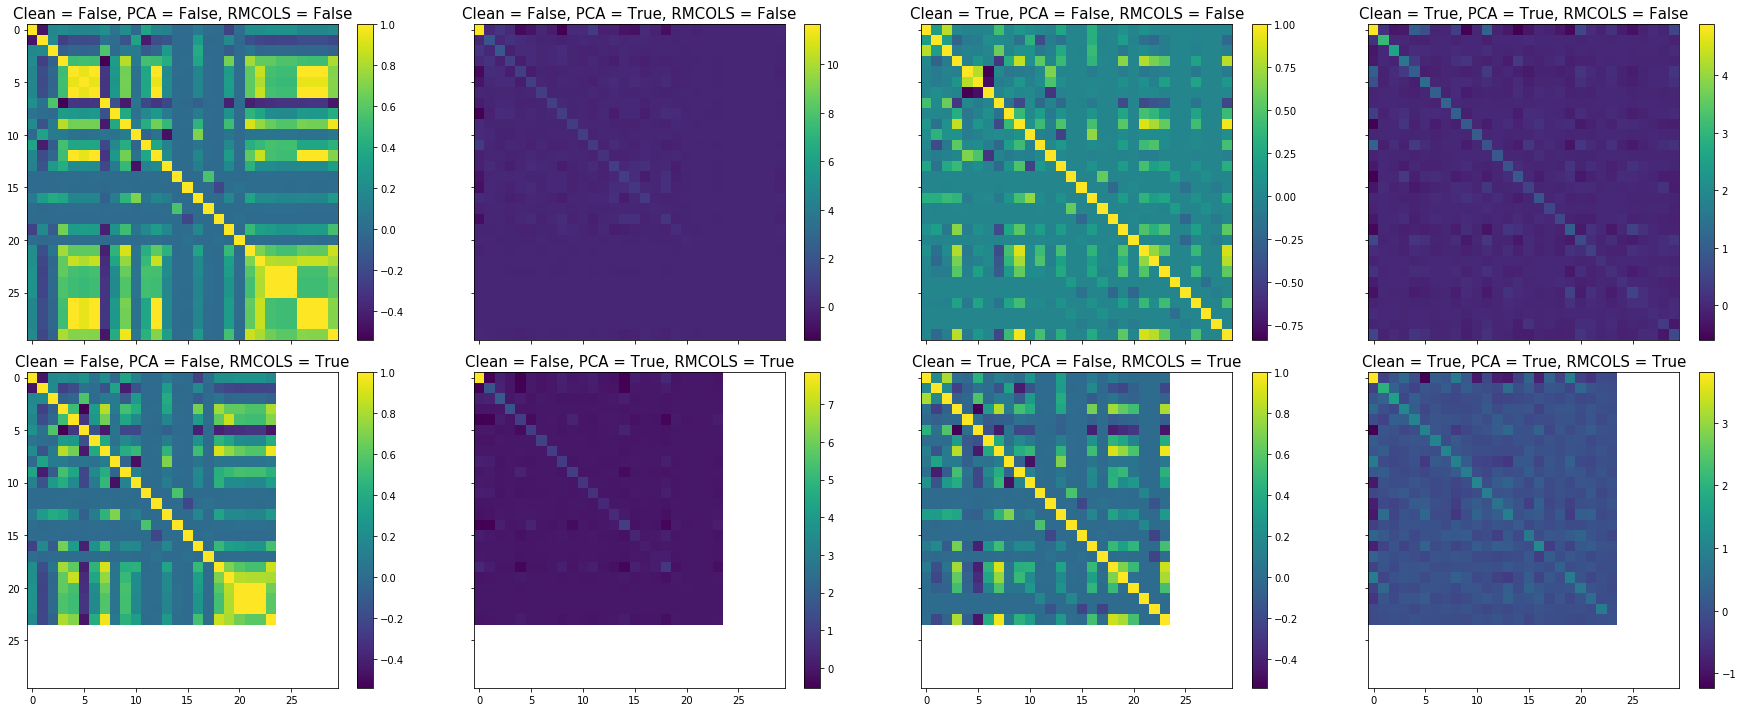

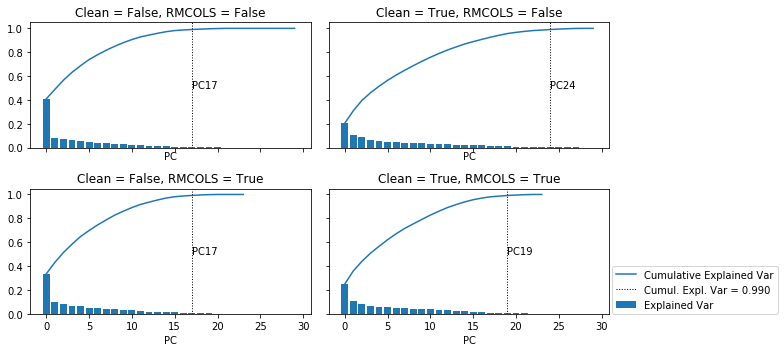

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10), sharex=True, sharey=True)
fig2, ax2 = plt.subplots(2, 2, figsize=(11, 5), sharex=True, sharey=True)
bools = [True, False]
max_cumul_expl_var = 0.99
for i, rm in enumerate(bools):
    for j, cl in enumerate(bools):
        for k, pc in enumerate(bools):
            this_ax = ax.ravel()[np.ravel_multi_index(
                [int(rm), int(cl), int(pc)], (2, 2, 2))]
            this_y, this_x, this_x_mean, this_x_std, _, eigenvals = preprocess(
                x,
                y,
                clean=cl,
                dopca=pc,
                remove_cols=rm,
                cols=(4, 5, 6, 12, 26, 27, 28))
            this_ax2 = ax2[int(rm), int(cl)]
            if pc:
                total_var = sum(eigenvals)
                expl_var = eigenvals / total_var
                cumulative_expl_var = np.cumsum(expl_var)
                this_ax2.bar(range(len(eigenvals)),
                             expl_var,
                             label='Explained Var')
                this_ax2.plot(range(len(eigenvals)),
                              cumulative_expl_var,
                              label='Cumulative Explained Var')
                get_max_pct = np.arange(len(eigenvals))[
                    cumulative_expl_var > max_cumul_expl_var][0]
                this_ax2.axvline(get_max_pct,
                                 c='k',
                                 ls=':',
                                 lw=1,
                                 label='Cumul. Expl. Var = %.3f' %
                                 max_cumul_expl_var)
                this_ax2.set_title('Clean = %s, RMCOLS = %s' %
                                   (cl, rm))
                this_ax2.set_xlabel('PC')
                this_ax2.text(get_max_pct, 0.5,'PC%i'%get_max_pct)
            imshow_data(np.cov(this_x.T), this_ax)
            this_ax.set_title('Clean = %s, PCA = %s, RMCOLS = %s' %
                              (cl, pc, rm), fontsize=15)
            ax2.ravel()[-1].legend(loc = (1.01, 0))

fig.tight_layout()
fig.savefig('../plots/preprocessing_cases_covmat.png', dpi = 200)
fig2.tight_layout()
fig2.savefig('../plots/preprocessing_pca_cases_explvar.png', dpi = 200)

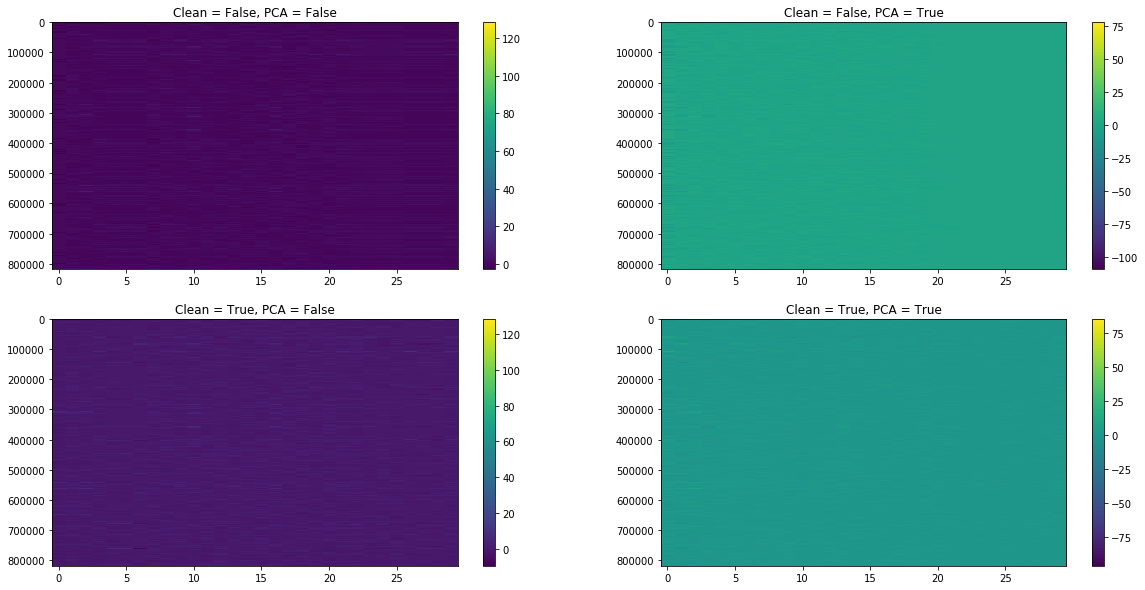

In [8]:
plot_prep_steps(x, y, imshow_data)

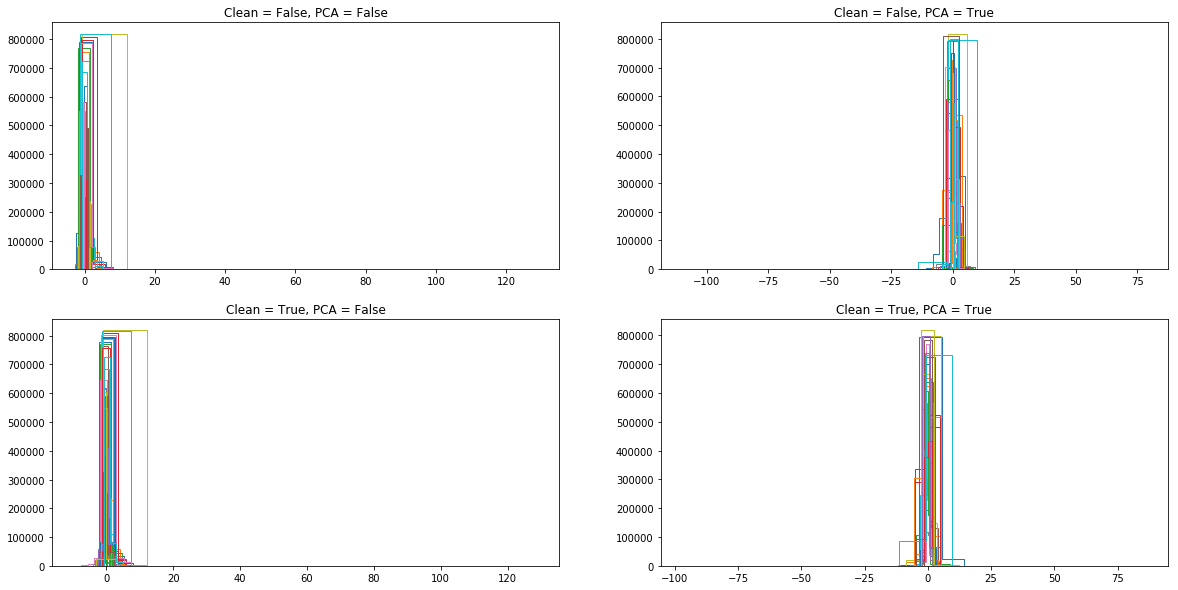

In [9]:
plot_prep_steps(x, y, plot_distributions)

True


(-1000, 1500)

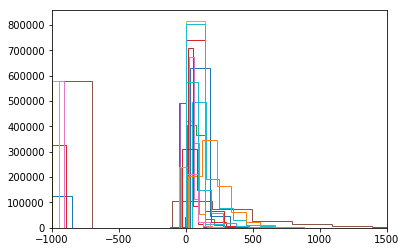

In [16]:
fig = plt.figure()
plot_distributions(x, plt.gca())
print((x==-999).any())
plt.xlim(-1000, 1500)

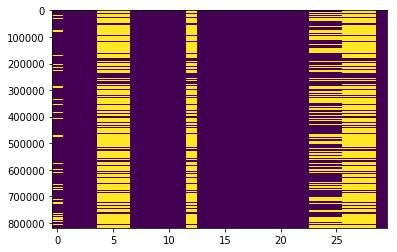

In [18]:
plt.imshow(x==-999, aspect='auto')

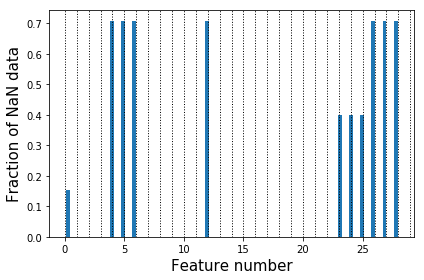

In [28]:
nan_rows, nan_cols = np.where(x == -999)
y_hist, x_hist, _ = plt.hist(nan_cols,
                             bins=60,
                             weights=np.ones(len(nan_cols)) / len(y),
                             rwidth=0.7)
plt.xlabel('Feature number', fontsize = 15)
plt.ylabel('Fraction of NaN data', fontsize =15)

nan_cols_set = list(set(nan_cols))
col_ids = [plt.axvline(col_no, c='k', ls=':', lw=1) for col_no in range(30)]
plt.gcf()
plt.tight_layout()
plt.savefig('../plots/nan_fraction.png', dpi=200)

Text(0, 0.5, 'Fraction of NaN data')

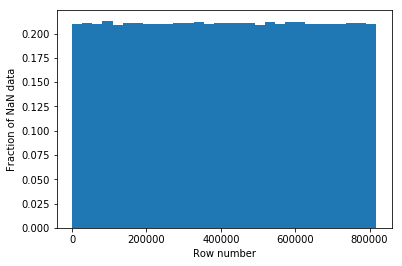

In [20]:
plt.hist(nan_rows, bins=30, weights = np.ones(len(nan_cols))/len(y))
plt.xlabel('Row number')
plt.ylabel('Fraction of NaN data')

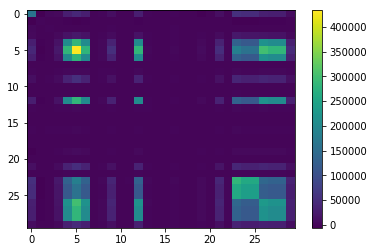

In [21]:
f = plt.figure()
imshow_data(np.cov(x.T), plt.gca())


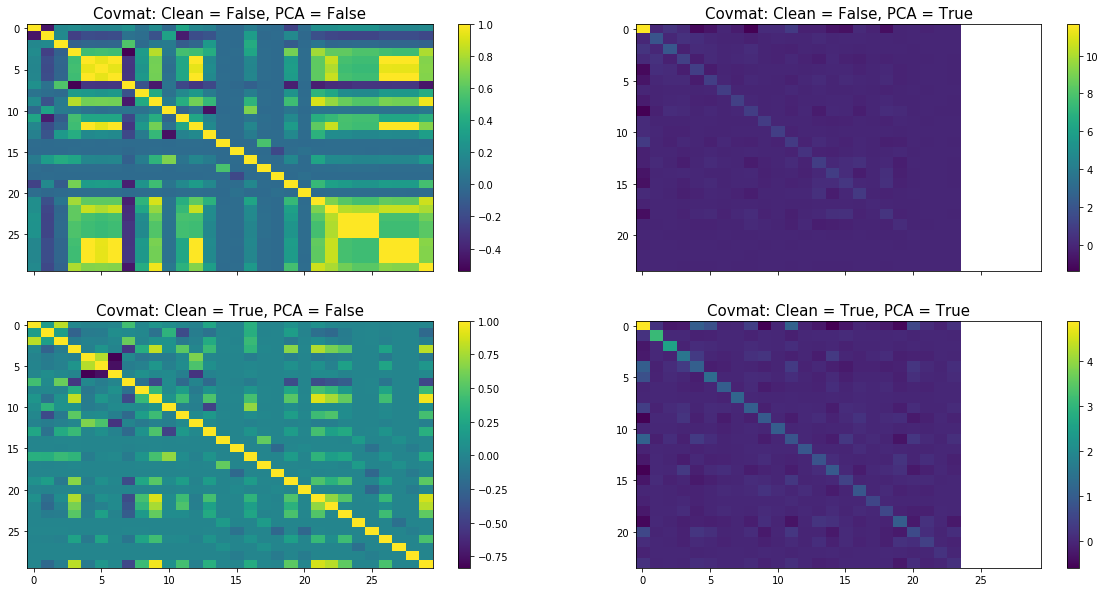

In [22]:
bools = [True,False]
cov_mat_plot, cov_plot_ax = plt.subplots(2, 2, figsize = (20, 10), sharex=True)
for cl in bools:
    for pc in bools:
        this_ax = cov_plot_ax[int(cl), int(pc)]
        this_y, this_x, this_x_mean, this_x_std, _, _ = preprocess(x, y, clean = cl, dopca=pc, max_comp=24)
        C = np.cov(this_x.T)
        imshow_data(C, this_ax)
        this_ax.set_title('Covmat: Clean = %s, PCA = %s'%(cl, pc), fontsize = 15)


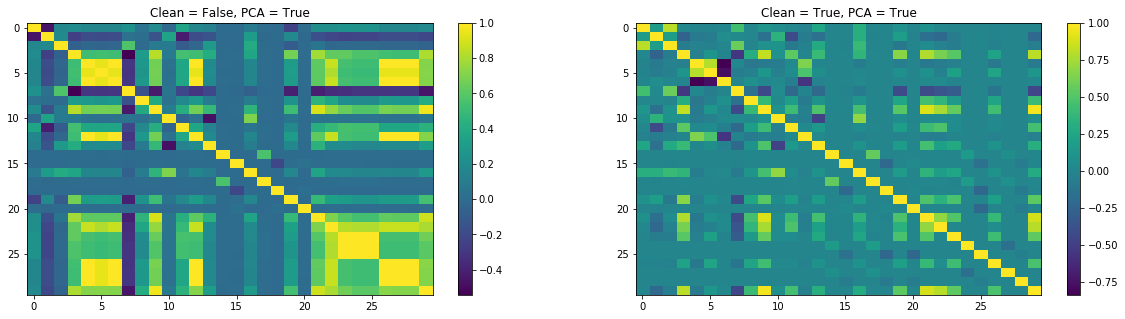

In [23]:
# Check that the computed transformation does indeed recover the original
# covariance matrix from the diagonal one.
cov_mat_plot, cov_plot_ax = plt.subplots(1, 2, figsize = (20, 5))
for cl in bools:
    pc = True
    this_ax = cov_plot_ax[int(cl)]
    this_y, this_x, this_x_mean, this_x_std, transform, _ = preprocess(x, y, clean = cl, dopca=pc)
    C = np.cov(this_x.T) # Diagonal covmat
    imshow_data(transform.dot(C).dot(transform.T), this_ax) # Recall transform is orthogonal.
    this_ax.set_title('Clean = %s, PCA = %s'%(cl, pc))


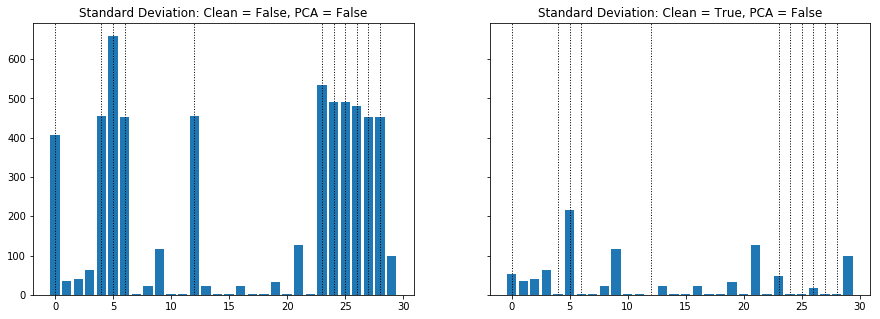

In [24]:
std_feature_plot, std_feature_ax = plt.subplots(1, 2, figsize = (15, 5), sharey=True)
for cl in bools:
    pc= False #This doesnt affect the result
    this_ax = std_feature_ax[int(cl)]
    this_y, this_x, this_x_mean, this_x_std, _, _ = preprocess(x, y, clean = cl, dopca=pc)
    this_ax.bar(range(30),this_x_std)
    [this_ax.axvline(col, c = 'k', ls= ':', lw =1) for col in nan_cols_set]
    this_ax.set_title('Standard Deviation: Clean = %s, PCA = %s'%(cl, pc))
        

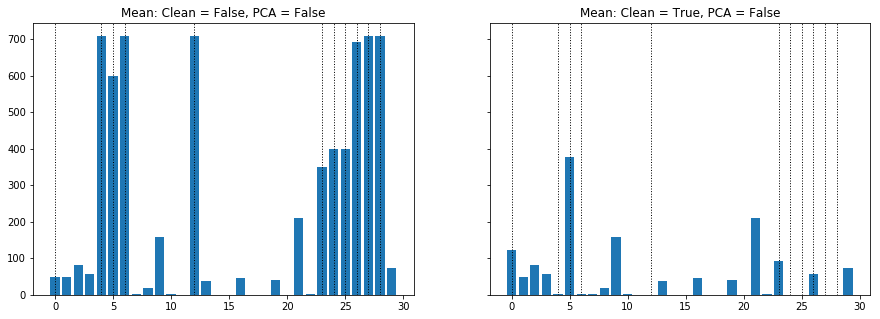

In [25]:
mean_feature_plot, mean_feature_ax = plt.subplots(1, 2, figsize = (15, 5), sharey=True)
for cl in bools:
    pc= False #This doesnt affect the result
    this_ax = mean_feature_ax[int(cl)]
    this_y, this_x, this_x_mean, this_x_std, _, _ = preprocess(x, y, clean = cl, dopca=pc)
    this_ax.bar(range(30),abs(this_x_mean))
    [this_ax.axvline(col, c = 'k', ls= ':', lw =1) for col in nan_cols_set]
    this_ax.set_title('Mean: Clean = %s, PCA = %s'%(cl, pc))


In [26]:
clean_noclean_comparison = {}
for cl in bools:
    pc= True #This doesnt affect the result
    this_y, this_x, this_x_mean, this_x_std, _, _ = preprocess(x_in, y_in, clean = cl, dopca=pc, max_comp=24)
    print(this_x.shape)
    clean_noclean_comparison[int(cl)]=this_x

(250000, 24)
(250000, 24)


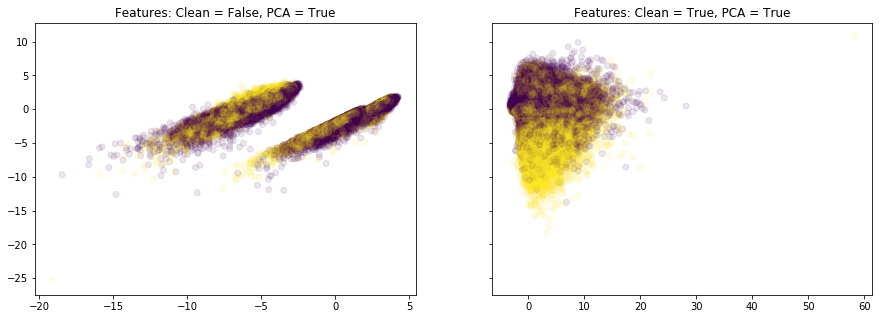

In [27]:
two_feature_plot, two_feature_ax = plt.subplots(1,
                                                2,
                                                figsize=(15, 5),
                                                sharey=True)
for cl in bools:
    this_ax = two_feature_ax[int(cl)]
    this_ax.scatter(clean_noclean_comparison[int(cl)][:, 0],
                    clean_noclean_comparison[int(cl)][:, 1],
                    c=this_y,
                    alpha=0.1)
    this_ax.set_title('Features: Clean = %s, PCA = %s' % (cl, pc))

# Results Plots

In [141]:
def cross_validation_visualization_degree(results, method, case, yscale='log', save = False):
    """Visualization the curves of mse_tr and mse_te."""
    lambds = results[:, 0]
    mse_tr = results[:, 1]
    mse_te = results[:, 2]
    std_tr = results[:, 4]
    std_te = results[:, 5]

    best_l_err = lambds[np.argmin(mse_te)]
    print('Best degree from error: %i' % best_l_err)
    plt.yscale(yscale)
    plt.errorbar(lambds,
                 mse_tr,
                 yerr=std_tr,
                 marker="^",
                 color='b',
                 label='train error')
    plt.errorbar(lambds,
                 mse_te,
                 yerr=std_te,
                 marker="o",
                 color='r',
                 label='test error')
    plt.axvline(best_l_err,
                c='g',
                label='degree$=%i$' % best_l_err,
                ls=':')
    plt.xlabel("degree", fontsize=15)
    plt.ylabel("mse", fontsize=15)
    #plt.title("Cross validation", fontsize=15)
    plt.legend(loc=0, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    if save:
        plt.savefig('../plots/%sALL%s'%(method, case.replace('.dat', '_loss.png')), dpi=200)
    
def cross_validation_visualization_accuracy_degree(results, method, case, save = False):
    """Visualization the accuracy curve."""

    lambdas = results[:, 0]
    accuracies = results[:, 3]
    accuracies_std = results[:, 6]
    #plt.xscale('log')
    plt.errorbar(lambdas,
                 accuracies,
                 yerr=accuracies_std,
                 lw=2,
                 marker='*',
                 label='Accuracy ratio')
    best_l_acc = lambdas[np.argmax(accuracies)]
    plt.axvline(best_l_acc,
                c='k',
                label='degree$=%i$' % best_l_acc,
                ls=':')
    print('Best degree from accuracy: %i' % best_l_acc)
    plt.xlabel("degree", fontsize=15)
    plt.ylabel("accuracy", fontsize=15)
    #plt.title("Cross validation", fontsize=15)
    plt.legend(loc=0, fontsize=10)
    plt.grid(True)
    #plt.ylim(0.4, 1)
    plt.tight_layout()
    if save:
        plt.savefig('../plots/%sALL%s'%(method, case.replace('.dat', '_acc.png')), dpi=200)

In [142]:
import os
all_results = os.listdir('../results/')
dat_results = [s for s in all_results if '.dat' in s]
methods = [
    'least_squares', 'least_squares_GD', 'least_squares_SGD', 'ridge_regression',
    'reg_logistic_regression', 'logistic_regression'
]

def plot_degrees(method, cl, pca, rmcols, stdafter='', yscale='linear', save=False):
    if stdafter != '':
        stdafter = '_stdafter%i'%stdafter
    case = '_cl%i_pca%i_rmcols%i%s.dat'%(int(cl), int(pca), int(rmcols), stdafter)
    method = 'cv_%s_d'%method
    outarray_acc = []
    outarray_loss = []
    # Results format:
    # lambda, loss_tr, loss te, acc, loss_tr_std, loss_te_std, acc_std
    for result in dat_results:
        if method in result and case in result:
            print('Reading %s'%result)
            data = np.loadtxt(os.path.join('../results/', result))
            if len(data.shape)!=1:
                best_lambda_acc = data[np.argmax(data[:,3]), :]
                best_lambda_loss = data[np.argmin(data[:,2]), :]
            else:
                best_lambda_acc = data
                best_lambda_loss = data
            d=int(result.replace(method, '').replace(case, ''))
            best_lambda_acc[0] = d
            best_lambda_loss[0] = d
            outarray_acc.append(best_lambda_acc)
            outarray_loss.append(best_lambda_loss)
    outarray_acc=np.array(outarray_acc)
    outarray_acc=outarray_acc[outarray_acc[:,0].argsort()]
    outarray_loss=np.array(outarray_loss)
    outarray_loss=outarray_loss[outarray_loss[:,0].argsort()]
    plt.figure()
    cross_validation_visualization_degree(outarray_loss, method, case, yscale=yscale, save=save)
    plt.figure()
    cross_validation_visualization_accuracy_degree(outarray_acc, method, case, save=save)


Reading cv_ridge_regression_d11_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d10_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d9_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d6_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d2_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d15_cl1_pca0_rmcols0.dat
Reading cv_ridge_regression_d20_cl1_pca0_rmcols0.dat
Best degree from error: 2
Best degree from accuracy: 10


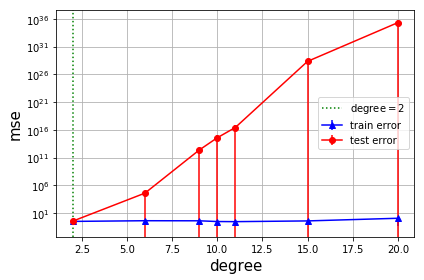

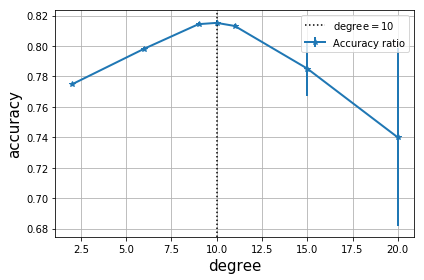

In [143]:
plot_degrees('ridge_regression', 1, 0, 0, yscale='log', save = True)

Reading cv_least_squares_GD_d7_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d3_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d5_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d10_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d8_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d1_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d9_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d6_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d2_cl1_pca0_rmcols0_stdafter1.dat
Reading cv_least_squares_GD_d4_cl1_pca0_rmcols0_stdafter1.dat
Best degree from error: 8
Best degree from accuracy: 6


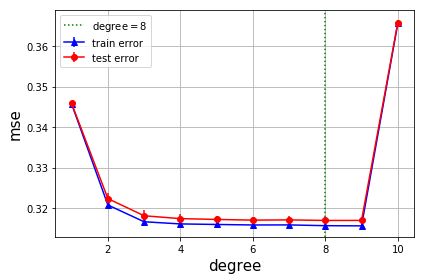

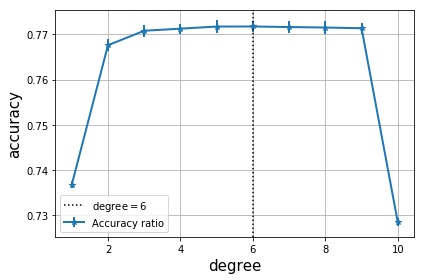

In [144]:
plot_degrees('least_squares_GD', 1, 0, 0, 1, save = True)

In [185]:
method = 'ridge_regression'
def plot_preprocessing_tests(method):
    plt.figure()
    bools = [True, False]
    count = 0
    pca_colors = ['r', 'b']
    cl_marker = ['v', '^']
    rm_fill_style = ['none', 'full']
    for i, rm in enumerate(bools):
        for j, cl in enumerate(bools):
            for k, pc in enumerate(bools):
                #this_ax = ax.ravel()[np.ravel_multi_index(
                #    [int(rm), int(cl), int(pc)], (2, 2, 2))]
                data = np.loadtxt('../results/cv_%s_d%i_cl%i_pca%i_rmcols%i.dat' %
                                  (method, 2, int(cl), int(pc), int(rm)))
                if len(data.shape)!=1:
                    data = data[np.argmax(data[:,3]), :]
                plt.errorbar(count,
                             data[3],
                             yerr=data[6],
                             c=pca_colors[pc],
                             marker = cl_marker[cl],
                             fillstyle = rm_fill_style[rm],
                             markersize = 10,
                             label='d%i_cl%i_pca%i_rmcols%i' %
                             (2, int(cl), int(pc), int(rm)))
                plt.legend(loc=(1.01, 0))
                count += 1
    plt.grid()
    plt.ylabel('Accuracy', fontsize = 15)
    plt.xlabel('Test', fontsize = 15)
    plt.title('Preprocessing tests on %s'%method, fontsize = 15)
    plt.tight_layout()
    plt.gcf()
    plt.savefig('preprocessing_tests_%s.png'%method, dpi = 200)

[None, None, None, None, None, None]

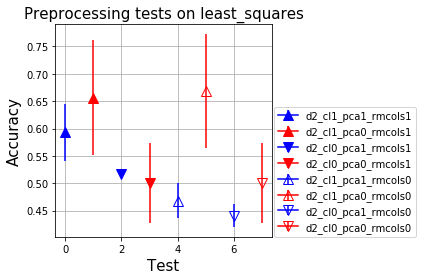

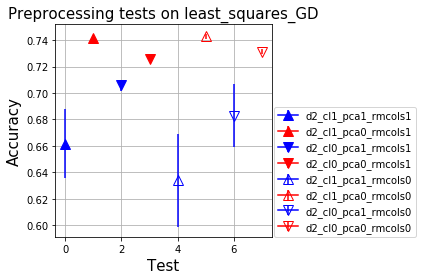

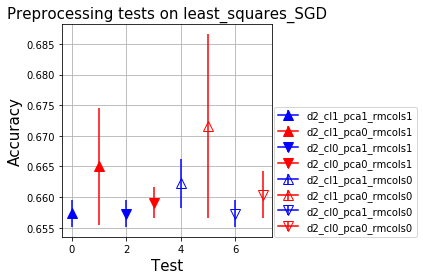

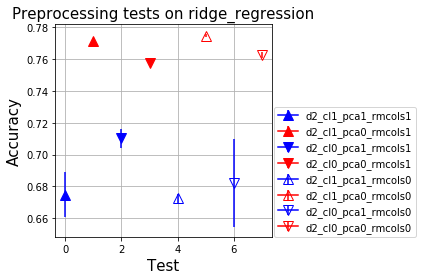

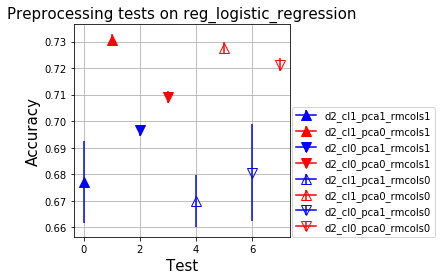

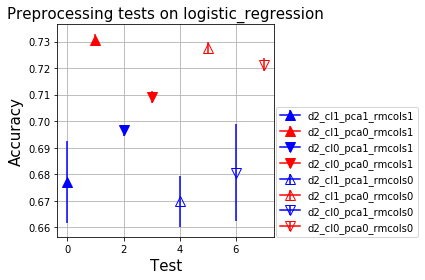

In [186]:
[plot_preprocessing_tests(m) for m in methods]